# Credit Card Fraud Detection Capstone Project

# Made by Samad Khan 

## Problem Statement 

#### The rise of online transactions has led to an increase in fraudulent credit card activities. Unauthorized transactions not only result in financial losses for banks but also diminish customer trust and satisfaction. As fraudsters become more sophisticated, it is crucial to develop an effective fraud detection system to mitigate these risks.The aim of this project is to identify and predict fraudulent credit card transactions using machine learning models. By leveraging advanced algorithms and handling imbalanced data efficiently, we strive to create a model that can accurately differentiate between legitimate and fraudulent transactions in real time.

## Data Understanding: 

# Data Source : https://kh3-ls-storage.s3.us-east-1.amazonaws.com/DS Project Guide Data Set/creditcard.csv

### The dataset used in this project consists of credit card transactions made by European cardholders over two days in September 2013. It contains 284,807 transactions, out of which only 492 are fraudulent, making up just 0.172% of the dataset. This extreme class imbalance presents a challenge in building an effective fraud detection model.
### To maintain confidentiality, most of the features in the dataset have been transformed using Principal Component Analysis (PCA). The dataset includes:

### Time: The number of seconds elapsed between the first transaction and the subsequent transactions.
### Amount: The transaction amount, which can be used for fraud pattern analysis.
### V1 to V28: Anonymized numerical features obtained through PCA.
### Class: The target variable, where 0 represents a legitimate transaction and 1 indicates fraud.
### The distribution plots of these features suggest that transformations have already been applied, and the dataset is ready for further processing and modeling. The primary objective is to build a classification model capable of accurately detecting fraudulent transactions while minimizing false positives to avoid unnecessary disruptions for legitimate users.

## Importing Python Libraries 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE

## Load dataset

In [17]:
data = pd.read_csv(r"C:\Users\samad\Downloads\creditcard.csv")

## Exploratory Data Analysis

In [18]:
print("Dataset Overview:")
print(data.head())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26   

# Data Cleaning: Handling missing values (if any)

In [21]:
data = data.dropna()

# Feature Selection & Scaling

In [23]:
X = data.drop(columns=["Class"])
y = data["Class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling Imbalanced Data using SMOTE

In [25]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Splitting the data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Selection and Hyperparameter Tuning

In [29]:
param_grid = {
    'n_estimators': [50, 100],  # Reduce options
    'max_depth': [None, 10],  # Reduce options
    'min_samples_split': [5, 10]  # Reduce options
}

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)  # Use all CPU cores
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)  # Reduce cv and enable parallelism

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


# Model Training

In [30]:
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:


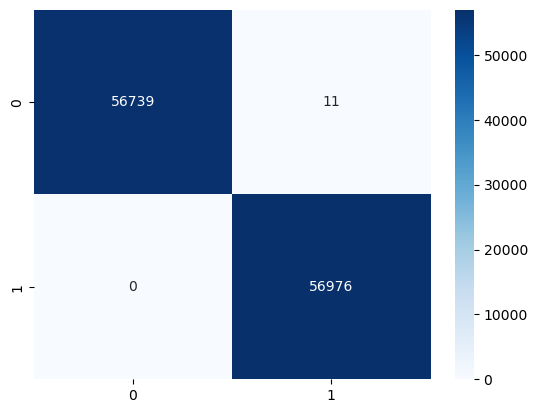

In [33]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

# Additional Metrics

In [35]:
roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")

ROC-AUC Score: 1.0000
Precision-Recall AUC: 1.0000


# Model Deployment Plan

In [37]:
print("\nModel Deployment Plan:")
print("1. Save the trained model using joblib or pickle.")
print("2. Create an API using Flask or FastAPI to serve predictions.")
print("3. Deploy the API on a cloud platform like AWS, GCP, or Azure.")


Model Deployment Plan:
1. Save the trained model using joblib or pickle.
2. Create an API using Flask or FastAPI to serve predictions.
3. Deploy the API on a cloud platform like AWS, GCP, or Azure.
